In [1]:
import os
import cv2
import numpy as np
import pandas as pd 
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [2]:
INPUT_PATH = "/Users/miteshwandhare/Downloads/train"
# print(os.listdir(INPUT_PATH))
len(os.listdir(INPUT_PATH))
image_files = os.listdir(INPUT_PATH)

In [3]:
labels = [file.split('.')[0] for file in image_files]

raw_data = pd.DataFrame({'filename': image_files, 'label': labels})

raw_data

,filename,label
0,dog.8011.jpg,dog
1,cat.5077.jpg,cat
2,dog.7322.jpg,dog
3,cat.2718.jpg,cat
4,cat.10151.jpg,cat
...,...,...
24997,dog.8008.jpg,dog
24998,dog.1992.jpg,dog
24999,dog.12412.jpg,dog
25000,cat.2701.jpg,cat


In [4]:
# Standardizing labels to 'cat' and 'dog'
raw_data['label'] = raw_data['label'].map({'cats': 'cat', 'dogs': 'dog'}).fillna(raw_data['label'])
# Removing rows with empty string as label
filtered_data = raw_data[raw_data['label'] != '']
# Filtering the DataFrame to include only 'cat' and 'dog' labels
filtered_data = raw_data[raw_data['label'].isin(['cat', 'dog'])]

# Displaying the filtered DataFrame
print(filtered_data)


            filename label
0       dog.8011.jpg   dog
1       cat.5077.jpg   cat
2       dog.7322.jpg   dog
3       cat.2718.jpg   cat
4      cat.10151.jpg   cat
...              ...   ...
24997   dog.8008.jpg   dog
24998   dog.1992.jpg   dog
24999  dog.12412.jpg   dog
25000   cat.2701.jpg   cat
25001  cat.10148.jpg   cat

[25001 rows x 2 columns]


In [5]:
unique_labels = filtered_data['label'].unique()
print("Unique labels in the 'label' column:", unique_labels)


Unique labels in the 'label' column: ['dog' 'cat']


In [6]:
# Counting occurrences of each label
label_counts = raw_data['label'].value_counts()

# Displaying the counts
print(label_counts)


label
cat    12501
dog    12500
           1
Name: count, dtype: int64


In [7]:
from sklearn.model_selection import train_test_split

# Splitting raw_data into train and temp sets
train_data, temp_data = train_test_split(filtered_data, test_size=0.2, random_state=42)

# Splitting temp_data into validation and test sets
validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Displaying the number of samples in each set
print(f"Number of samples in the training set: {len(train_data)}")
print(f"Number of samples in the validation set: {len(validation_data)}")
print(f"Number of samples in the test set: {len(test_data)}")

Number of samples in the training set: 20000
Number of samples in the validation set: 2500
Number of samples in the test set: 2501


In [8]:
# Import the ImageDataGenerator class
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the image dimensions and Batch size
WIDTH = 128
HEIGHT = 128
IMG_SIZE = (WIDTH , HEIGHT)
BATCH = 32

# Create an ImageDataGenerator object for the validation set
validation_datagen = ImageDataGenerator(rescale=1. / 255)
# Create an ImageDataGenerator object for the test set
test_datagen = ImageDataGenerator(rescale=1. / 255)
# Create an ImageDataGenerator object for the training set

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [9]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=filtered_data,
    directory=INPUT_PATH,
    x_col="filename",
    y_col="label",  
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=1
)

print(train_generator.class_indices)
print(train_generator.samples)


Found 25000 validated image filenames belonging to 2 classes.
{'cat': 0, 'dog': 1}
25000


/Users/miteshwandhare/anaconda3/lib/python3.11/site-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [10]:
validation_generator = validation_datagen.flow_from_dataframe(dataframe=temp_data,
    directory=INPUT_PATH,
    x_col="filename",
    y_col="label",  # Replace with the actual column name containing class labels
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=1
)

print(validation_generator.class_indices)

Found 5001 validated image filenames belonging to 2 classes.
{'cat': 0, 'dog': 1}


In [16]:
test_generator = test_datagen.flow_from_dataframe(dataframe=test_data,
    directory=INPUT_PATH,
    x_col="filename",
    y_col="label", 
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=1
)

print(test_generator.class_indices)

Found 2501 validated image filenames belonging to 2 classes.
{'cat': 0, 'dog': 1}


In [12]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Dense, Flatten

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(WIDTH, HEIGHT, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        2

In [13]:
import time
EPOCHS = 60
beg = int(time.time())

history = model.fit(
        train_generator,
        steps_per_epoch = train_generator.samples  // BATCH,
        epochs = EPOCHS,
        validation_data = validation_generator,
        validation_steps = validation_generator.samples // BATCH,
        )

end = int(time.time())
t = end - beg
hrs = t // 3600
mins = (t - 3600 * hrs) // 60
secs = t % 60
print("training took {} hrs -- {} mins -- {} secs".format(hrs,mins,secs))


Epoch 1/60
781/781 [==============================] - 415s 531ms/step - loss: 0.6371 - accuracy: 0.6693 - val_loss: 0.8817 - val_accuracy: 0.6204
Epoch 2/60
781/781 [==============================] - 432s 553ms/step - loss: 0.5080 - accuracy: 0.7504 - val_loss: 0.4710 - val_accuracy: 0.7760
Epoch 3/60
781/781 [==============================] - 436s 557ms/step - loss: 0.4213 - accuracy: 0.8046 - val_loss: 0.4198 - val_accuracy: 0.8123
Epoch 4/60
781/781 [==============================] - 436s 557ms/step - loss: 0.3841 - accuracy: 0.8273 - val_loss: 0.3216 - val_accuracy: 0.8596
Epoch 5/60
781/781 [==============================] - 402s 514ms/step - loss: 0.3404 - accuracy: 0.8491 - val_loss: 0.2826 - val_accuracy: 0.8796
Epoch 6/60
781/781 [==============================] - 1069s 1s/step - loss: 0.3075 - accuracy: 0.8663 - val_loss: 0.2806 - val_accuracy: 0.8820
Epoch 7/60
781/781 [==============================] - 402s 514ms/step - loss: 0.2867 - accuracy: 0.8753 - val_loss: 0.2339 - v

In [14]:
scores = model.evaluate(test_generator)

79/79 [==============================] - 11s 137ms/step - loss: 0.0380 - accuracy: 0.9888


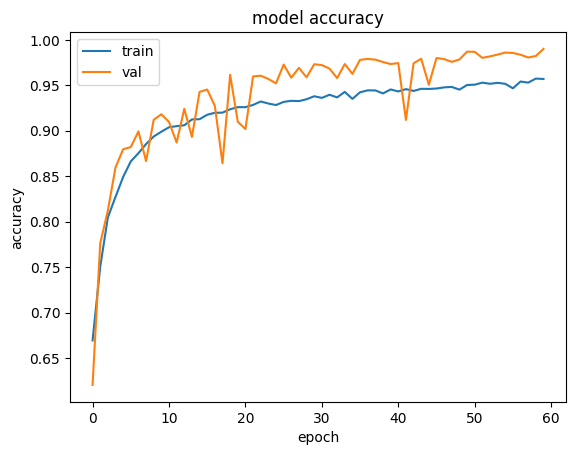

NameError: name 'accuracy' is not defined

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
print(accuracy)
print(history.history['accuracy'])

In [17]:
labels = ["Cat","Dog"]

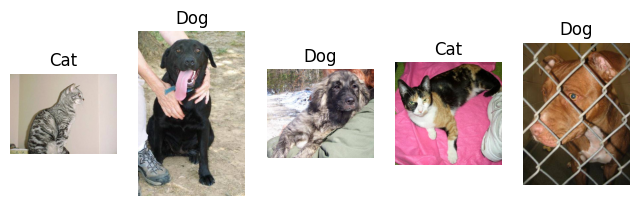

In [24]:
import random
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8, 5))

for j in range(5):
    i = random.randint(0, 1800)
    filename = raw_data.iloc[i]['filename']
    image_path = os.path.join('/Users/miteshwandhare/Downloads/train', filename)
    dog_test_img = cv2.imread(image_path)
    
    if dog_test_img is not None:
        dog_test_img = cv2.cvtColor(dog_test_img, cv2.COLOR_BGR2RGB)
        fig.add_subplot(2, 5, j+1)
        plt.imshow(dog_test_img)
        plt.axis('off')

        dog_test_img = cv2.resize(dog_test_img, (128, 128))
        dog_test_img = np.reshape(dog_test_img, (1, 128, 128, 3))

        results = model.predict(dog_test_img, verbose=0)
        results = np.squeeze(results)
        plt.title(labels[results.astype(int)])

plt.show()



1/1 [==============================] - 0s 94ms/step
[[8.74544128e-01 8.88888889e-04]
 [1.25455872e-01 9.99111111e-01]]


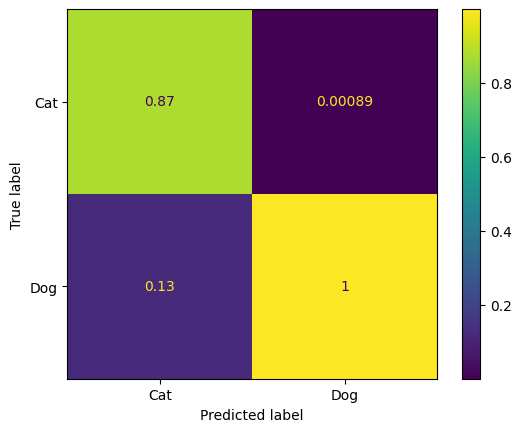

In [25]:
from sklearn.metrics import confusion_matrix
ys = []
y_predictions = []

for step in range( test_generator.samples // 32):
    (x, y) = next(test_generator)
    y = y.astype(int)
    ys = ys + list(y)

    #Predict
    y_prediction = model.predict(x)
    #print(y_prediction)
    y_prediction = np.round(y_prediction,1).astype(int)
    #print(y_prediction.shape)
    y_prediction = np.reshape(y_prediction,y.shape)
    y_predictions  = y_predictions + list(y_prediction)
    #print(y_prediction)
#Create confusion matrix and normalizes it over predicted (columns)
cm = confusion_matrix(ys, y_predictions , normalize='pred')
print(cm)
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm, display_labels=labels)
disp.plot()
plt.show()

In [26]:
from sklearn.metrics import accuracy_score, f1_score

test_generator = train_datagen.flow_from_dataframe(
    dataframe=test_data,
    directory=INPUT_PATH,
    x_col="filename",
    y_col="label",
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Make predictions using the model
y_true = test_generator.classes
y_pred_probabilities = model.predict(test_generator)

# Convert probabilities to binary labels using a threshold (here 0.5)
y_pred_binary = (y_pred_probabilities > 0.5).astype(int)

# Calculating accuracy
accuracy = accuracy_score(y_true, y_pred_binary)
print("Accuracy:", accuracy)

# Calculating f1 score
f1 = f1_score(y_true, y_pred_binary)
print("f1 Score:", f1)


Found 2501 validated image filenames belonging to 2 classes.
79/79 [==============================] - 15s 191ms/step
Accuracy: 0.9664134346261496
f1 Score: 0.9669811320754716


1/1 [==============================] - 0s 17ms/step


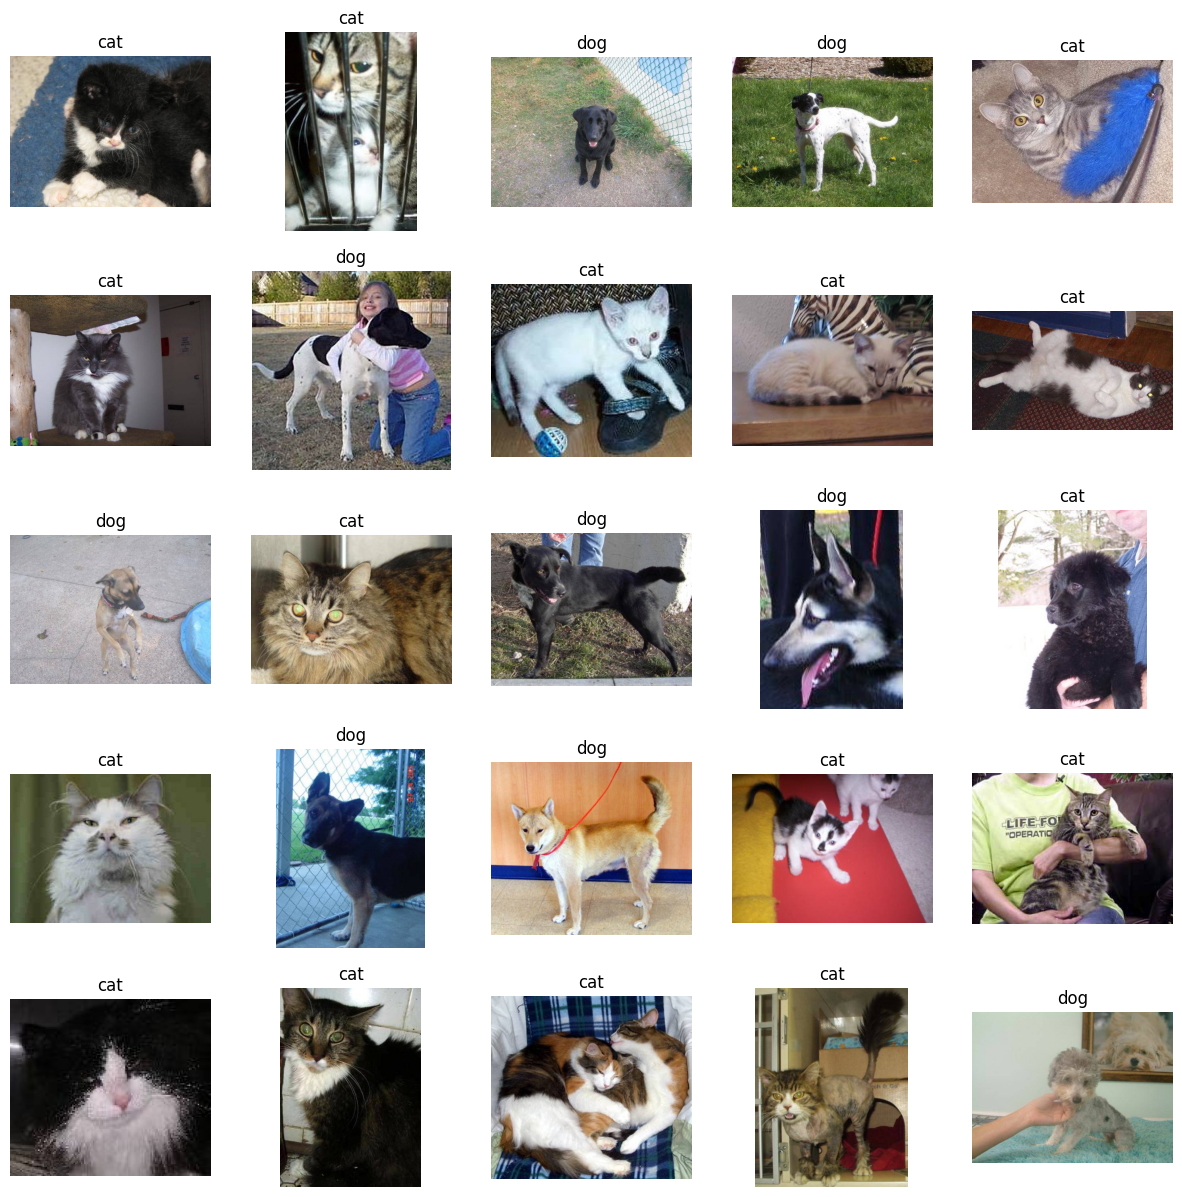

In [32]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os

# Load the trained model
model = load_model("/Users/miteshwandhare/Downloads/model.h5")

# Function to preprocess the image before feeding it to the model
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128))  # Assuming your model expects 128x128 images
    img = np.reshape(img, (1, 128, 128, 3))
    img = img / 255.0  # Normalize the pixel values to the range [0, 1]
    return img

# Path to the directory containing images
image_dir = "/Users/miteshwandhare/Downloads/test1/"

# List of image files in the directory
image_files = os.listdir(image_dir)

# Display 25 images along with their predicted classes
plt.figure(figsize=(15, 15))
for i in range(min(25, len(image_files))):
    image_path = os.path.join(image_dir, image_files[i])
    input_image = preprocess_image(image_path)
    
    # Make predictions
    predictions = model.predict(input_image)
    
    # Convert probabilities to class labels using a threshold (e.g., 0.5)
    predicted_class = "dog" if predictions[0][0] > 0.5 else "cat"

    # Read and display the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.subplot(5, 5, i + 1)
    plt.imshow(img)
    plt.title(predicted_class)
    plt.axis('off')

plt.show()
